In [113]:
import ast
import time
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from urllib.parse import urlparse, parse_qs
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

# Champions et leurs caractéristiques

In [2]:
#Accéder au site directement avec selenium
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

url = "https://www.op.gg/statistics/champions"

liste = list()
try:
    driver.get(url)
    
    WebDriverWait(driver, 70).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "table[class*='css-']"))
    )
    rows = driver.find_elements(By.CSS_SELECTOR, "table[class*='css-'] tbody tr")
    
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        if len(cells) > 0:
            cell_data = [cell.text for cell in cells]
            print(cell_data)
            liste.append(cell_data)

finally:
    driver.quit()


['Ranked Solo\nRanked Flex\nARAM\nURF']
['Tous\nIron\nBronze\nSilver\nGold\nPlatinum\nEmerald\nDiamond\nMaster\nGrandmaster\nChallenger']
['Global\nNA\nEUW\nEUNE\nOCE\nKR\nJP\nBR\nLAS\nLAN\nRU\nTR\nSG\nPH\nTW\nVN\nTH']
["Sur le dernier mois\nLes 7 derniers jours\nAujourd'hui"]
['Tous\nHaut\nJungle\nMilieu\nBas\nSupport']
['1', 'Jinx', '5\u202f601\u202f866', '2.37:1', '51.93%', '25.73%', '16.26%', '198.63', '11,460']
['2', 'Lux', '4\u202f015\u202f214', '2.56:1', '50.3%', '18.44%', '13.17%', '93.16', '10,358']
['3', 'Yone', '3\u202f885\u202f046', '1.69:1', '49%', '17.84%', '18.76%', '194.28', '12,357']
['4', 'Caitlyn', '3\u202f566\u202f533', '2.2:1', '49.42%', '16.38%', '11.9%', '191.18', '12,435']
['5', "Kai'Sa", '3\u202f419\u202f985', '2.38:1', '48.17%', '15.71%', '2.5%', '199.09', '13,069']
['6', 'Yasuo', '3\u202f364\u202f253', '1.67:1', '49.04%', '15.45%', '25.06%', '200.47', '12,649']
['7', 'Lee Sin', '3\u202f339\u202f951', '2.59:1', '48.47%', '15.34%', '13.21%', '154.05', '11,675']

In [3]:
champions = pd.Series(liste)
champions = pd.DataFrame(champions)
champions = pd.DataFrame(champions[0].to_list())
champions.dropna(inplace=True)
champions.rename(columns={1:"Champion",2:"Parties jouées",3:"KDA",4:"Ratio de victoire",5:"Taux de pick par match",6:"Ratio de ban par match",7:"CS",8:"Or"},inplace=True)
champions.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions.csv")

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Description des Colonnes</title>
</head>
<body>
    <h1>Description des Colonnes</h1>
    <ul>
        <li><strong>Champion:</strong> Nom du champion utilisé dans le jeu.</li>
        <li><strong>Parties jouées:</strong> Nombre total de parties jouées avec ce champion.</li>
        <li><strong>KDA:</strong> Ratio "Kills/Deaths/Assists" qui mesure la performance du joueur avec le champion.</li>
        <li><strong>Ratio de victoire:</strong> Pourcentage de parties gagnées avec ce champion.</li>
        <li><strong>Taux de pick par match:</strong> Fréquence à laquelle le champion est choisi dans les parties.</li>
        <li><strong>Ratio de ban par match:</strong> Fréquence à laquelle le champion est banni dans les parties.</li>
        <li><strong>CS:</strong> Nombre moyen de "creep score" (unités tuées) par partie.</li>
        <li><strong>Or:</strong> Or moyen accumulé par partie avec ce champion.</li>
    </ul>
</body>
</html>


In [243]:
champions

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
5,1,Jinx,5 497 675,2.37:1,51.94%,25.74%,16.21%,198.69,"11,442"
6,2,Lux,3 938 956,2.56:1,50.3%,18.45%,13.16%,93.1,"10,357"
7,3,Yone,3 816 172,1.69:1,48.99%,17.87%,18.77%,194.3,"12,357"
8,4,Caitlyn,3 501 242,2.2:1,49.43%,16.4%,11.89%,191.23,"12,435"
9,5,Kai'Sa,3 350 725,2.38:1,48.18%,15.69%,2.49%,199.12,"13,071"
...,...,...,...,...,...,...,...,...,...
167,163,Ryze,331 865,2.13:1,48.53%,1.55%,0.19%,202.7,"12,047"
168,164,Kennen,315 704,2.02:1,48.65%,1.48%,0.47%,167.22,"11,434"
169,165,Corki,304 950,2.14:1,46.32%,1.43%,0.16%,197.11,"12,767"
170,166,Taric,303 493,2.78:1,52.17%,1.42%,0.26%,40.37,"8,332"


In [3]:
#Les noms prélevés sur le site et certains dans les liens ne correspondaient pas
#Une solution était de les mettre en minuscule, de remplacer certains éléments par d'autres comme "é" par "e"
ChampionsList = list(champions["Champion"])
ChampionsList = [x.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi").replace("dr.mundo", "drmundo").replace("wukong", "monkeyking").replace("nunuetwillump", "nunu").replace("renataglasc", "renata").replace("é","e") for x in ChampionsList]
ChampionsList

NameError: name 'champions' is not defined

# Données : Faible Fort

### Il nous a semblé pertinent de scrapper les données sur les champions contre lesquels un champion est plus faible ou plus fort.

In [245]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

df_champions = pd.DataFrame(index=ChampionsList, columns=['Faibles contre', 'Taux de victoire (faible)', 'Forts contre', 'Taux de victoire (fort)'])

wait = WebDriverWait(driver, 10)

for champion_name in ChampionsList:
    url = f"https://www.op.gg/champions/{champion_name}/build"
    driver.get(url)
    print(f"Champion analysé : {champion_name.capitalize()}")

    weak_info = []
    fort_info = []

    weak = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-17rk1u8.e1y283ae3")))
    for index, elem in enumerate(weak, start=1):
        weak_win_rate = wait.until(EC.visibility_of(elem.find_element(By.XPATH, f'.//ancestor::div[@id="content-container"]/aside/div[1]/div[2]/div/ul[1]/li[{index}]/a')))
        weak_champion_link = weak_win_rate.get_attribute('href')
        weak_champion_adversaire = parse_qs(urlparse(weak_champion_link).query).get('target_champion', [None])[0]
        weak_info.append((weak_champion_adversaire, weak_win_rate.text))

    fort = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-1syqaij.e1y283ae3")))
    for index, elem in enumerate(fort, start=1):
        fort_win_rate = wait.until(EC.visibility_of(elem.find_element(By.XPATH, f'.//ancestor::div[@id="content-container"]/aside/div[1]/div[2]/div/ul[2]/li[{index}]/a')))
        fort_champion_link = fort_win_rate.get_attribute('href')
        fort_champion_adversaire = parse_qs(urlparse(fort_champion_link).query).get('target_champion', [None])[0]
        fort_info.append((fort_champion_adversaire, fort_win_rate.text))
    
    df_champions.loc[champion_name, 'Faibles contre'] = [x[0] for x in weak_info]
    df_champions.loc[champion_name, 'Taux de victoire (faible)'] = [x[1] for x in weak_info]
    df_champions.loc[champion_name, 'Forts contre'] = [x[0] for x in fort_info]
    df_champions.loc[champion_name, 'Taux de victoire (fort)'] = [x[1] for x in fort_info]

driver.quit()

Champion analysé : Jinx
Champion analysé : Lux
Champion analysé : Yone
Champion analysé : Caitlyn


KeyboardInterrupt: 

In [66]:
df_champions.dropna()

,Faibles contre,Taux de victoire (faible),Forts contre,Taux de victoire (fort)
jinx,"[veigar, twitch, kogmaw, jhin]","[43.62%\n149\nParties, 46.97%\n2,906\nParties,...","[varus, samira, kalista, caitlyn, missfortune]","[55.88%\n1,668\nParties, 54.23%\n1,383\nPartie..."
lux,"[poppy, sona, braum, leona, brand]","[35.29%\n51\nParties, 39.9%\n208\nParties, 42....","[zac, swain, hwei, xerath, camille]","[57.78%\n45\nParties, 57.45%\n94\nParties, 55...."
yone,"[lux, brand, neeko, syndra, twistedfate]","[39.73%\n224\nParties, 41.49%\n94\nParties, 42...","[velkoz, karma, azir, corki, orianna]","[62.16%\n37\nParties, 58.16%\n98\nParties, 57...."
caitlyn,"[veigar, ziggs, twitch, jinx, xayah]","[44.83%\n58\nParties, 45.12%\n82\nParties, 45....","[senna, nilah, aphelios, kalista, smolder]","[57.5%\n80\nParties, 54.59%\n218\nParties, 53...."
kaisa,"[nilah, senna, kogmaw, ziggs, zeri]","[40.56%\n641\nParties, 41.6%\n125\nParties, 43...","[missfortune, caitlyn, aphelios, smolder, yasuo]","[51.62%\n587\nParties, 51.19%\n1,856\nParties,..."
...,...,...,...,...
monkeyking,"[evelynn, fiddlesticks, kayn, gragas, nocturne]","[40.74%\n54\nParties, 40.91%\n44\nParties, 40....","[karthus, warwick, jarvaniv, masteryi, graves]","[65.71%\n35\nParties, 63.41%\n41\nParties, 58...."
nunu,"[belveth, skarner, olaf, kindred, sylas]","[42.67%\n75\nParties, 43.01%\n93\nParties, 43....","[sejuani, warwick, xinzhao, masteryi, ivern]","[65.71%\n35\nParties, 65.22%\n46\nParties, 62...."
ksante,"[shen, rengar, reksai, singed, smolder]","[32.81%\n128\nParties, 33.33%\n33\nParties, 37...","[gnar, udyr, yasuo, jayce, chogath]","[61.48%\n122\nParties, 59.74%\n77\nParties, 58..."
zoe,"[diana, malzahar, akali, malphite, galio]","[36.92%\n65\nParties, 37.84%\n37\nParties, 40....","[ekko, azir, orianna, hwei, tristana]","[62.16%\n37\nParties, 60.34%\n58\nParties, 55...."


Une ligne correspond à un champion. Chaque colonne correspond pour l'instant aux champions contre lesquels il est plus fort/ faible avec le taux de victoire. Il est nécessaire de diviser les colonnes pour apercevoir la donnée de façon plus compréhensible.

In [73]:
transformed_data = []
for index, row in df_champions.iterrows():
    faibles_contre = row['Faibles contre'] if isinstance(row['Faibles contre'], list) else []
    taux_victoire_faible = row['Taux de victoire (faible)'] if isinstance(row['Taux de victoire (faible)'], list) else []

    forts_contre = row['Forts contre'] if isinstance(row['Forts contre'], list) else []
    taux_victoire_fort = row['Taux de victoire (fort)'] if isinstance(row['Taux de victoire (fort)'], list) else []

    for faible, taux_faible in zip(faibles_contre, taux_victoire_faible):
        transformed_data.append([index, faible, 0, taux_faible])

    for fort, taux_fort in zip(forts_contre, taux_victoire_fort):
        transformed_data.append([index, fort, 1, taux_fort])
def split_taux_et_parties(taux_parties_str):
    taux, parties, _ = taux_parties_str.split('\n')
    return taux, parties

df_transformed = pd.DataFrame(transformed_data, columns=['Champion', 'Adversaire', 'Type (0=Faible, 1=Fort)', 'Taux de victoire'])

df_transformed[['Taux de victoire', 'Parties']] = df_transformed['Taux de victoire'].apply(lambda x: pd.Series(split_taux_et_parties(x)))

df_transformed.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/FaibleFort.csv")

In [84]:
df_transformed["Parties"] = df_transformed["Parties"].apply(lambda x : x.replace(",",""))
df_transformed["Parties"] = df_transformed["Parties"].astype(int)

AttributeError: 'int' object has no attribute 'replace'

In [86]:
df_transformed

,Champion,Adversaire,"Type (0=Faible, 1=Fort)",Taux de victoire,Parties
0,jinx,veigar,0,43.62%,149
1,jinx,twitch,0,46.97%,2906
2,jinx,kogmaw,0,48.14%,1157
3,jinx,jhin,0,49.86%,3664
4,jinx,varus,1,55.88%,1668
...,...,...,...,...,...
1658,renata,braum,1,61.76%,102
1659,renata,swain,1,60%,35
1660,renata,neeko,1,59.38%,32
1661,renata,ashe,1,59.32%,59


In [85]:
df_transformed.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/FaibleFort.csv")

In [72]:
champions['Champion'] = ChampionsList
champions

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,champion
5,1,jinx,5 291 016,2.37:1,51.96%,25.77%,16.07%,198.73,"11,405",jinx
6,2,lux,3 793 152,2.56:1,50.31%,18.48%,13.19%,93.06,"10,360",lux
7,3,yone,3 679 120,1.69:1,48.99%,17.92%,18.76%,194.27,"12,358",yone
8,4,caitlyn,3 374 666,2.2:1,49.45%,16.44%,11.91%,191.26,"12,436",caitlyn
9,5,kaisa,3 207 097,2.38:1,48.19%,15.62%,2.48%,199.08,"13,075",kaisa
...,...,...,...,...,...,...,...,...,...,...
167,163,ryze,312 114,2.12:1,48.49%,1.52%,0.19%,202.6,"12,046",ryze
168,164,kennen,304 155,2.03:1,48.66%,1.48%,0.47%,167.23,"11,439",kennen
169,165,taric,291 768,2.78:1,52.17%,1.42%,0.26%,40.38,"8,334",taric
170,166,corki,288 268,2.15:1,46.38%,1.4%,0.16%,197.06,"12,773",corki


# Dataset historique parties jouées

In [3]:
# Fonction pour accepter les cookies si le bouton est présent
def accept_cookies_if_present(driver):
    try:
        accept_cookies_button = driver.find_element(By.CSS_SELECTOR, "button.css-k8o10q")
        accept_cookies_button.click()
        print("Le bouton 'J'ACCEPTE' a été cliqué.")
    except NoSuchElementException:
        print("Le bouton 'J'ACCEPTE' n'est pas présent sur la page.")
    except ElementClickInterceptedException:
        wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.css-k8o10q"))).click()
        print("Le bouton 'J'ACCEPTE' était intercepté mais a été cliqué après attente.")


def click_show_more(driver, wait):
    actions = ActionChains(driver)
    while True:
        try:
            # Recherche du bouton "Show More"
            show_more_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "button.more")))
            # Faire défiler la page jusqu'au bouton "Show More"
            actions.move_to_element(show_more_button).perform()
            # Cliquer sur le bouton "Show More" s'il est présent et cliquable
            if show_more_button.is_displayed() and show_more_button.is_enabled():
                driver.execute_script("arguments[0].click();", show_more_button)
            # Faire défiler la page vers le bas pour charger plus de contenu
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            # Attendre que les nouveaux éléments soient chargés et que le bouton soit à nouveau disponible
            time.sleep(2)
        except TimeoutException:
            print("Plus de bouton 'Show More' à cliquer.")
            break
        except NoSuchElementException:
            print("Bouton 'Show More' non trouvé, fin de la boucle.")
            break
        except ElementClickInterceptedException:
            print("Le bouton 'Show More' n'est pas cliquable pour le moment. Réessayer...")
            time.sleep(2)
        except Exception as e:
            print(f"Une exception inattendue est survenue: {e}")
            break

chrome_options = Options()
chrome_options.add_argument("--disable-notifications")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

url = "https://www.op.gg/leaderboards/tier"
driver.get(url)

wait = WebDriverWait(driver, 10)
data = []
# Récupérer les liens vers les profils des joueurs
test1 = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-rmp2x6.euud7vz0")))

liste_noms=list()
for elem in test1:
    profile_link = elem.find_element(By.CSS_SELECTOR, "a.summoner-link").get_attribute("href")
    liste_noms.append(profile_link)

In [5]:
url
# cette ligne de code est essentiel lorsque le code pour scrapper les éléments des joueurs s'est arrêté à cause d'un problème inattendu. Cela nous permet de ne pas rescrapper depuis le début mais seulement de rescrapper les donénes à partir de cet url. 

NameError: name 'url' is not defined

In [37]:
#url='https://www.op.gg/summoners/euw/Raz%C3%B8rk%20Activoo-razzz'
if url in liste_noms:
    index = liste_noms.index(url)
    del liste_noms[:index]
liste_noms
#Ce code contient les url dont les informations n'ont pas encore été scrappées.

['https://www.op.gg/summoners/euw/Erdotee-EUW',
 'https://www.op.gg/summoners/euw/Kenal-EUW',
 'https://www.op.gg/summoners/euw/exert%20pressure-toffe',
 'https://www.op.gg/summoners/euw/McNuggets%20Maker-EUW',
 'https://www.op.gg/summoners/euw/kostaskiller4-2589',
 'https://www.op.gg/summoners/euw/HARPOON-GOAT',
 'https://www.op.gg/summoners/euw/dridro-EUW',
 'https://www.op.gg/summoners/euw/FornoReason-Gap',
 'https://www.op.gg/summoners/euw/RELATIVOOO-EUW',
 'https://www.op.gg/summoners/euw/BAHAHHAHAHAHAHHA-EUW',
 'https://www.op.gg/summoners/euw/Zanzarah-1996',
 'https://www.op.gg/summoners/euw/naau-1812',
 'https://www.op.gg/summoners/euw/jogabonito7-418',
 'https://www.op.gg/summoners/euw/Ph%C3%A2ntasma-EUW',
 'https://www.op.gg/summoners/euw/TheShackledOne-001',
 'https://www.op.gg/summoners/euw/SOSADAWG23-KEEF',
 'https://www.op.gg/summoners/euw/%C5%A0U%C5%A0%C5%87OJED-mis',
 'https://www.op.gg/summoners/euw/T%CE%BF%CE%B1st-EUW',
 'https://www.op.gg/summoners/euw/%EA%B9%80%EB%B

In [38]:
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 10)
data = []
# Scrapping des données des parties passées.
for url in liste_noms:
    driver.get(url)
    accept_cookies_if_present(driver)
    click_show_more(driver, wait)
    wait_parties = WebDriverWait(driver, 10)
    while True:
        try:
            show_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.more")))
            show_more_button.click()
            wait.until(EC.invisibility_of_element(show_more_button))
            wait_parties = WebDriverWait(driver, 3)
        except Exception as e:
            print("Le bouton 'Show More' n'est plus présent ou une autre exception s'est produite:", e)
        break
        
    parties = wait_parties.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-j7qwjs.e1155w840")))

    for index, partie in enumerate(parties, start=1):
        
        partie_data = {
            'Résultat': partie.find_element(By.CSS_SELECTOR, ".result").text,
            'Durée': partie.find_element(By.CSS_SELECTOR, ".length").text,
            'Champion': partie.find_element(By.CSS_SELECTOR, "a.champion img").get_attribute("alt"),
            'Contribution': partie.find_element(By.CSS_SELECTOR, ".p-kill").text,
            'Rang': partie.find_element(By.CSS_SELECTOR, ".avg-tier").text,
            'KDA' : partie.find_element(By.CSS_SELECTOR, ".kda").text,
            'KDA ratio' : partie.find_element(By.CSS_SELECTOR, ".kda-ratio").text,
            'Type de jeu': partie.find_element(By.CSS_SELECTOR, ".game-type").text,
            'Tags': [tag_element.text for tag_element in partie.find_elements(By.CSS_SELECTOR, ".game-tags__scroll-container div.tag")],
            'Items alt text': [img.get_attribute("alt") for img in partie.find_elements(By.CSS_SELECTOR, "dl.items > dd div.item img")],
            'Noms héros': [img.get_attribute("alt") for img in partie.find_elements(By.CSS_SELECTOR, "div.icon img")]

        }
        
        data.append(partie_data)
        print("Données de la partie", index, "collectées.")
driver.quit()

Le bouton 'J'ACCEPTE' n'est pas présent sur la page.
Plus de bouton 'Show More' à cliquer.
Le bouton 'Show More' n'est plus présent ou une autre exception s'est produite: Message: 
Stacktrace:
0   chromedriver                        0x0000000104c72934 chromedriver + 4368692
1   chromedriver                        0x0000000104c6adc8 chromedriver + 4337096
2   chromedriver                        0x000000010488ec04 chromedriver + 289796
3   chromedriver                        0x00000001048d0e00 chromedriver + 560640
4   chromedriver                        0x00000001049095ec chromedriver + 792044
5   chromedriver                        0x00000001048c5ab4 chromedriver + 514740
6   chromedriver                        0x00000001048c650c chromedriver + 517388
7   chromedriver                        0x0000000104c36e50 chromedriver + 4124240
8   chromedriver                        0x0000000104c3bc40 chromedriver + 4144192
9   chromedriver                        0x0000000104c1c818 chromedriver + 

WebDriverException: Message: disconnected: unable to send message to renderer
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=124.0.6367.62)
Stacktrace:
0   chromedriver                        0x0000000104c72934 chromedriver + 4368692
1   chromedriver                        0x0000000104c6adc8 chromedriver + 4337096
2   chromedriver                        0x000000010488ec04 chromedriver + 289796
3   chromedriver                        0x00000001048783c0 chromedriver + 197568
4   chromedriver                        0x0000000104876b1c chromedriver + 191260
5   chromedriver                        0x00000001048777f0 chromedriver + 194544
6   chromedriver                        0x00000001048930e0 chromedriver + 307424
7   chromedriver                        0x0000000104895180 chromedriver + 315776
8   chromedriver                        0x000000010490a020 chromedriver + 794656
9   chromedriver                        0x00000001049095ec chromedriver + 792044
10  chromedriver                        0x00000001048c5ab4 chromedriver + 514740
11  chromedriver                        0x00000001048c650c chromedriver + 517388
12  chromedriver                        0x0000000104c36e50 chromedriver + 4124240
13  chromedriver                        0x0000000104c3bc40 chromedriver + 4144192
14  chromedriver                        0x0000000104c1c818 chromedriver + 4016152
15  chromedriver                        0x0000000104c3c570 chromedriver + 4146544
16  chromedriver                        0x0000000104c0e2cc chromedriver + 3957452
17  chromedriver                        0x0000000104c5beb8 chromedriver + 4275896
18  chromedriver                        0x0000000104c5c034 chromedriver + 4276276
19  chromedriver                        0x0000000104c6aa28 chromedriver + 4336168
20  libsystem_pthread.dylib             0x0000000194182f94 _pthread_start + 136
21  libsystem_pthread.dylib             0x000000019417dd34 thread_start + 8


In [39]:
df=pd.DataFrame(data)
df

,Résultat,Durée,Champion,Contribution,Rang,KDA,KDA ratio,Type de jeu,Tags,Items alt text,Noms héros
0,Défaite,30:36,Lulu,C/Tués 47%,Grandmaster,1 / 5 / 7,1.60:1 KDA,Match classé Solo,[],"[Rédemption, Rêve éveillé, Bottes de lucidité,...","[Tahm Kench, Xin Zhao, Corki, Zeri, Lulu, Jax,..."
1,Victoire,25:9,Thresh,C/Tués 69%,Grandmaster,1 / 3 / 17,6.00:1 KDA,Match classé Solo,[],"[Rédemption, Opposition céleste, Médaillon de ...","[Malphite, Xin Zhao, Orianna, Draven, Thresh, ..."
2,Défaite,23:52,Nautilus,C/Tués 65%,Grandmaster,1 / 10 / 10,1.10:1 KDA,Match classé Solo,[],"[Gemme exaltante, Opposition céleste, Coques e...","[Annie, Lee Sin, Aatrox, Lucian, Nami, Jax, Sk..."
3,Victoire,20:31,Lulu,C/Tués 73%,Grandmaster,3 / 5 / 29,6.40:1 KDA,Match classé Solo,[],"[Rédemption, Rêve éveillé, Bottes de lucidité,...","[Yone, Evelynn, Lucian, Zeri, Nautilus, Jax, X..."
4,Défaite,21:54,Rakan,C/Tués 39%,Grandmaster,0 / 6 / 7,1.17:1 KDA,Match classé Solo,[],"[Sandales de Mercure, Opposition céleste, Vœu ...","[Yone, Talon, Ahri, Xayah, Rell, Jax, Vi, LeBl..."
...,...,...,...,...,...,...,...,...,...,...,...
3827,Victoire,8:17,Sylas,C/Tués 46%,Emerald 2,11 / 2 / 2,6.50:1 KDA,Ultra Rapid Fire,[],"[Fléau de liche, Chaussures de sorcier, Flamme...","[Twisted Fate, Singed, Alistar, Sion, Sylas, T..."
3828,Victoire,33:57,Ahri,C/Tués 63%,Master,5 / 7 / 15,2.86:1 KDA,Match classé Solo,[],"[Sablier de Zhonya, Fléau de liche, Chaussures...","[Twisted Fate, Kayn, Ahri, Kai'Sa, Shen, Jayce..."
3829,Victoire,33:30,Akshan,C/Tués 39%,Master,10 / 4 / 4,3.50:1 KDA,Match classé Solo,[Double Kill],"[Lame d'infini, Opportunité, Bottes de célérit...","[Illaoi, Kayn, Azir, Xayah, Janna, Rumble, Zac..."
3830,Défaite,14:47,Lee Sin,C/Tués 37%,Platinum 1,7 / 12 / 4,0.92:1 KDA,Ultra Rapid Fire,[Double Kill],"[Lame de Doran, Hydre profane, Orgueil, Mantea...","[Nautilus, Olaf, Jinx, Quinn, Teemo, Wukong, D..."


In [40]:
# ***Calcul du nombre maximal d'items pour créer des colonnes spécifiques***
max_items = max(len(item) for item in df["Items alt text"])

# ***Création de nouvelles colonnes pour chaque item, gestion des listes de longueur variable***
for i in range(max_items):
    df[f'Item {i+1}'] = df['Items alt text'].apply(lambda x: x[i] if i < len(x) else None)

# ***Suppression de la colonne originale après extraction des items***
df.drop('Items alt text', axis=1, inplace=True)

# ***Nettoyage des chaînes de caractères dans les colonnes d'items***
df[["Item 1", "Item 2", "Item 3", "Item 4", "Item 5", "Item 6", "Item 7"]] = df[["Item 1", "Item 2", "Item 3", "Item 4", "Item 5", "Item 6", "Item 7"]].replace(to_replace=[r"^\[|\]$|'|\""], value="", regex=True)

# ***Conversion des résultats de match en valeurs binaires***
df["Résultat"]=df["Résultat"].apply(lambda x: 0 if x=="Défaite" else 1)

# ***Séparation de la colonne 'KDA' en trois nouvelles colonnes***
df[['Kill', 'Death', 'Assist']] = df['KDA'].str.split(' / ', expand=True)

# ***Conversion du pourcentage de contribution en valeur numérique***
df['Contribution'] = df['Contribution'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)

# ***Conversion de la durée des matches de format minutes:secondes à minutes ***
df['Durée'] = df['Durée'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df['Durée']=df['Durée'].apply(lambda x: x/60)

# ***Extraction et limitation de la précision des valeurs du ratio KDA***
df["KDA ratio"]=df["KDA ratio"].apply(lambda x: x[:7])

# ***Suppression de la colonne 'KDA' originale après la séparation***
df.drop(columns="KDA", inplace=True)

# ***Nettoyage des tags pour retirer les caractères spéciaux***
df['Tags'] = df['Tags'].str.replace(r"^\['|'\]$", '', regex=True)
df['Tags'] = df['Tags'].replace("[]", None)

# ***Fonction pour évaluer de manière sûre les chaînes qui représentent des structures de données***
def safe_literal_eval(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except ValueError:
            return value  
    return value 

# ***Application de la fonction pour convertir les chaînes en listes dans la colonne 'Noms héros'***
df['Noms héros'] = df['Noms héros'].apply(safe_literal_eval)

# ***Division des noms des héros en deux équipes basées sur leur position***
df["Équipe 1"] = df["Noms héros"].apply(lambda x: x[:5])
df["Équipe 2"] = df["Noms héros"].apply(lambda x: x[5:])

# ***Assignation de l'équipe du champion spécifié dans une nouvelle colonne***
df["Équipe"] = df.apply(lambda row: 1 if row["Champion"] in row["Équipe 1"] else 2, axis=1)

# ***Extraction des champions pour chaque équipe***
for i in range(1, 6):
    df[f'Équipe 1 Champion {i}'] = df['Équipe 1'].apply(lambda x: x[i-1] if len(x) > i-1 else None)
    df[f'Équipe 2 Champion {i}'] = df['Équipe 2'].apply(lambda x: x[i-1] if len(x) > i-1 else None)


,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,...,Équipe 1 Champion 1,Équipe 2 Champion 1,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5
0,0,30.600000,Lulu,0.47,Grandmaster,1.60:1,Match classé Solo,NaN,"[Tahm Kench, Xin Zhao, Corki, Zeri, Lulu, Jax,...",Rédemption,...,Tahm Kench,Jax,Xin Zhao,Taliyah,Corki,Qiyana,Zeri,Kai'Sa,Lulu,Rakan
1,1,25.150000,Thresh,0.69,Grandmaster,6.00:1,Match classé Solo,NaN,"[Malphite, Xin Zhao, Orianna, Draven, Thresh, ...",Rédemption,...,Malphite,Gragas,Xin Zhao,Karthus,Orianna,Jayce,Draven,Varus,Thresh,Nautilus
2,0,23.866667,Nautilus,0.65,Grandmaster,1.10:1,Match classé Solo,NaN,"[Annie, Lee Sin, Aatrox, Lucian, Nami, Jax, Sk...",Gemme exaltante,...,Annie,Jax,Lee Sin,Skarner,Aatrox,Ryze,Lucian,Kalista,Nami,Nautilus
3,1,20.516667,Lulu,0.73,Grandmaster,6.40:1,Match classé Solo,NaN,"[Yone, Evelynn, Lucian, Zeri, Nautilus, Jax, X...",Rédemption,...,Yone,Jax,Evelynn,Xin Zhao,Lucian,Sylas,Zeri,Jinx,Nautilus,Lulu
4,0,21.900000,Rakan,0.39,Grandmaster,1.17:1,Match classé Solo,NaN,"[Yone, Talon, Ahri, Xayah, Rell, Jax, Vi, LeBl...",Sandales de Mercure,...,Yone,Jax,Talon,Vi,Ahri,LeBlanc,Xayah,Zeri,Rell,Rakan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,1,8.283333,Sylas,0.46,Emerald 2,6.50:1,Ultra Rapid Fire,NaN,"[Twisted Fate, Singed, Alistar, Sion, Sylas, T...",Fléau de liche,...,Twisted Fate,Twisted Fate,Singed,Udyr,Alistar,Smolder,Sion,Kayle,Sylas,Garen
3828,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,"[Twisted Fate, Kayn, Ahri, Kai'Sa, Shen, Jayce...",Sablier de Zhonya,...,Twisted Fate,Jayce,Kayn,Nidalee,Ahri,Rumble,Kai'Sa,Senna,Shen,Camille
3829,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,"[Illaoi, Kayn, Azir, Xayah, Janna, Rumble, Zac...",Lame dinfini,...,Illaoi,Rumble,Kayn,Zac,Azir,Akshan,Xayah,Senna,Janna,Maokai
3830,0,14.783333,Lee Sin,0.37,Platinum 1,0.92:1,Ultra Rapid Fire,NaN,"[Nautilus, Olaf, Jinx, Quinn, Teemo, Wukong, D...",Lame de Doran,...,Nautilus,Wukong,Olaf,Diana,Jinx,Lee Sin,Quinn,Naafiri,Teemo,Gragas


In [41]:
faible_fort_df=pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/FaibleFort.csv")
faible_fort_df['Taux de victoire'] = faible_fort_df['Taux de victoire'].str.rstrip('%').astype(float) / 100.0

In [42]:
strong_against = {}
weak_against = {}

# ***Remplissage des dictionnaires à partir des données indiquant si un champion est fort ou faible contre un adversaire***
for index, row in faible_fort_df.iterrows():
    if row['Type (0=Faible, 1=Fort)'] == 1:
        strong_against.setdefault(row['Champion'], []).append(row['Adversaire'])
    else:
        weak_against.setdefault(row['Champion'], []).append(row['Adversaire'])

# ***Fonction pour normaliser les noms des champions pour assurer la cohérence lors des comparaisons***
def normalize_champion_name(name):
    """ Normalise les noms des champions selon des règles spécifiques """
    return (name.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi")
            .replace("dr.mundo", "drmundo").replace("wukong", "monkeyking")
            .replace("nunuetwillump", "nunu").replace("renataglasc", "renata")
            .replace("é", "e"))

# ***Fonction pour calculer les scores de force et de faiblesse pour chaque champion basé sur leurs adversaires***
def calculate_strength_scores(row):
    """ Calcule les scores Fort et Faible basés sur les match-ups entre champions """
    team_index = row['Équipe']
    own_team = f'Équipe {team_index}'
    opposing_team = f'Équipe {3 - team_index}'

    own_champions = [normalize_champion_name(champ) for champ in row[own_team]]
    opposing_champions = [normalize_champion_name(champ) for champ in row[opposing_team]]

    fort_count = 0
    faible_count = 0

    for champ in own_champions:
        fort_count += sum(1 for opp_champ in opposing_champions if opp_champ in strong_against.get(champ, []))
        faible_count += sum(1 for opp_champ in opposing_champions if opp_champ in weak_against.get(champ, []))
    
    return pd.Series([fort_count, faible_count])

# ***Application de la fonction pour calculer et ajouter les scores Fort et Faible dans le DataFrame principal***
results = df.apply(calculate_strength_scores, axis=1)
df['Fort'] = results[0]
df['Faible'] = results[1]

In [43]:
df.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/9.csv")

# Nettoyage de données

In [10]:
df2 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Partie2.csv")
df3 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Partie3.csv")
df4 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Partie4.csv")
df5 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/5.csv")
df6 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/6.csv")
df7 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Principal.csv")
df8 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/8.csv")
df9 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/9.csv")

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_16564/2828662932.py:6: DtypeWarning: Columns (8,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Principal.csv")


In [11]:
df=pd.concat([df2,df3,df4,df5,df6,df7,df8,df9],ignore_index=True)
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,...,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder', ...",Régénérateur de pierre de lune,...,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN
1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'B...",Corne du gardien,...,Mordekaiser,Zoé,Pyke,K'Santé,Twitch,Brand,Hwei,0,1,NaN
2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kenc...",Rayonnement du vide,...,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN
3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nauti...",Jambières du berzerker,...,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN
4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'R...",Tueur de krakens,...,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67390,1,8.283333,Sylas,0.46,Emerald 2,6.50:1,Ultra Rapid Fire,NaN,"['Twisted Fate', 'Singed', 'Alistar', 'Sion', ...",Fléau de liche,...,Udyr,Alistar,Smolder,Sion,Kayle,Sylas,Garen,2,0,NaN
67391,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,"['Twisted Fate', 'Kayn', 'Ahri', ""Kai'Sa"", 'Sh...",Sablier de Zhonya,...,Nidalee,Ahri,Rumble,Kai'Sa,Senna,Shen,Camille,1,2,NaN
67392,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,"['Illaoi', 'Kayn', 'Azir', 'Xayah', 'Janna', '...",Lame dinfini,...,Zac,Azir,Akshan,Xayah,Senna,Janna,Maokai,0,0,NaN
67393,0,14.783333,Lee Sin,0.37,Platinum 1,0.92:1,Ultra Rapid Fire,NaN,"['Nautilus', 'Olaf', 'Jinx', 'Quinn', 'Teemo',...",Lame de Doran,...,Diana,Jinx,Lee Sin,Quinn,Naafiri,Teemo,Gragas,1,0,NaN


In [12]:
df_solo = df[df["Type de jeu"]=="Match classé Solo"]
df_solo.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal.csv")

In [14]:
df_solo

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,...,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kenc...",Rayonnement du vide,...,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN
3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nauti...",Jambières du berzerker,...,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN
4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'R...",Tueur de krakens,...,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN
5,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,"['Volibear', 'Karthus', 'Talon', 'Jinx', 'Raka...",Tueur de krakens,...,Skarner,Talon,Vel'Koz,Jinx,Xayah,Rakan,Leona,0,1,NaN
6,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,"['Jax', 'Taliyah', 'Jayce', ""Kai'Sa"", 'Pyke', ...",Lame dinfini,...,Karthus,Jayce,Tristana,Kai'Sa,Zeri,Pyke,Rell,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67388,1,15.633333,Ekko,0.50,Master,4.50:1,Match classé Solo,NaN,"['Poppy', 'Shyvana', 'Zed', 'Zeri', 'Renata Gl...",Sceau noir,...,Viego,Zed,Ekko,Zeri,Kai'Sa,Renata Glasc,Blitzcrank,2,2,NaN
67389,1,31.566667,Ahri,0.50,Master,4.33:1,Match classé Solo,NaN,"[""K'Santé"", 'Nidalee', 'Tristana', ""Kai'Sa"", '...",Coiffe de Rabadon,...,Jarvan IV,Tristana,Ahri,Kai'Sa,Aphelios,Maokai,Lulu,0,1,NaN
67391,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,"['Twisted Fate', 'Kayn', 'Ahri', ""Kai'Sa"", 'Sh...",Sablier de Zhonya,...,Nidalee,Ahri,Rumble,Kai'Sa,Senna,Shen,Camille,1,2,NaN
67392,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,"['Illaoi', 'Kayn', 'Azir', 'Xayah', 'Janna', '...",Lame dinfini,...,Zac,Azir,Akshan,Xayah,Senna,Janna,Maokai,0,0,NaN


# Moyenne taux de victoire

In [86]:
df = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal.csv")
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.drop(columns="Noms héros",inplace=True)
df

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_21084/1504562324.py:1: DtypeWarning: Columns (8,9,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal.csv")


,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
0,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,...,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN
1,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,...,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN
2,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,...,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN
3,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,Tueur de krakens,Ouragan de Runaan,...,Skarner,Talon,Vel'Koz,Jinx,Xayah,Rakan,Leona,0,1,NaN
4,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,Lame dinfini,Danseur fantôme,...,Karthus,Jayce,Tristana,Kai'Sa,Zeri,Pyke,Rell,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,Ekko,0.50,Master,4.50:1,Match classé Solo,NaN,Sceau noir,Dent de Nashor,...,Viego,Zed,Ekko,Zeri,Kai'Sa,Renata Glasc,Blitzcrank,2,2,NaN
61113,1,31.566667,Ahri,0.50,Master,4.33:1,Match classé Solo,NaN,Coiffe de Rabadon,Malfaisance,...,Jarvan IV,Tristana,Ahri,Kai'Sa,Aphelios,Maokai,Lulu,0,1,NaN
61114,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,Sablier de Zhonya,Fléau de liche,...,Nidalee,Ahri,Rumble,Kai'Sa,Senna,Shen,Camille,1,2,NaN
61115,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,Lame dinfini,Opportunité,...,Zac,Azir,Akshan,Xayah,Senna,Janna,Maokai,0,0,NaN


In [98]:
champions = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions.csv")
champions = champions.loc[:, ~champions.columns.str.contains('Unnamed')]
ChampionsList = list(champions["Champion"])
ChampionsList = [x.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi").replace("dr.mundo", "drmundo").replace("wukong", "monkeyking").replace("nunuetwillump", "nunu").replace("renataglasc", "renata").replace("é","e") for x in ChampionsList]
champions["Champion"]=ChampionsList

champions['Ratio de victoire'] = champions['Ratio de victoire'].str.rstrip('%').astype(float) / 100.0
champions['Taux de pick par match'] = champions['Taux de pick par match'].str.rstrip('%').astype(float) / 100.0
champions['Ratio de ban par match'] = champions['Ratio de ban par match'].str.rstrip('%').astype(float) / 100.0

In [88]:
df["Équipe 1"]=list(df["Équipe 1 Champion 1"]+","+df["Équipe 1 Champion 2"]+","+df["Équipe 1 Champion 3"]+","+df["Équipe 1 Champion 4"]+","+df["Équipe 1 Champion 5"])
df["Équipe 1"]=df["Équipe 1"].apply(lambda x:x.replace("'","").split(","))

df["Équipe 2"]=list(df["Équipe 2 Champion 1"]+","+df["Équipe 2 Champion 2"]+","+df["Équipe 2 Champion 3"]+","+df["Équipe 2 Champion 4"]+","+df["Équipe 2 Champion 5"])
df["Équipe 2"]=df["Équipe 2"].apply(lambda x:x.replace("'","").split(","))

In [89]:
taux={}
taux_victoire = list(champions["Ratio de victoire"])
dict_taux = dictionary = dict(zip(ChampionsList, taux_victoire))
dict_taux

{'jinx': 0.5193,
 'lux': 0.503,
 'yone': 0.49,
 'caitlyn': 0.49420000000000003,
 'kaisa': 0.4817,
 'yasuo': 0.4904,
 'leesin': 0.48469999999999996,
 'ashe': 0.49939999999999996,
 'ahri': 0.5138,
 'ezreal': 0.4767,
 'volibear': 0.5114,
 'diana': 0.5152,
 'jhin': 0.5014,
 'viego': 0.506,
 'lucian': 0.4953,
 'missfortune': 0.4997,
 'brand': 0.5216,
 'smolder': 0.47479999999999994,
 'jax': 0.4988,
 'thresh': 0.4959,
 'darius': 0.49770000000000003,
 'vayne': 0.4999,
 'masteryi': 0.5086999999999999,
 'nautilus': 0.4852,
 'sylas': 0.4972,
 'akali': 0.4858,
 'shaco': 0.5004,
 'karma': 0.4824,
 'garen': 0.5174,
 'zeri': 0.49770000000000003,
 'aatrox': 0.4893,
 'senna': 0.4932,
 'veigar': 0.5175,
 'malphite': 0.5024000000000001,
 'twitch': 0.5096,
 'morgana': 0.5045000000000001,
 'mordekaiser': 0.51,
 'hwei': 0.48210000000000003,
 'lulu': 0.5008,
 'zed': 0.4877,
 'tristana': 0.49520000000000003,
 'kayn': 0.48619999999999997,
 'blitzcrank': 0.5078,
 'skarner': 0.4619,
 'warwick': 0.5107,
 'leona'

In [93]:
def normalize_champion_name(name):
    """ Normalise les noms des champions selon des règles spécifiques """
    return (name.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi")
            .replace("dr.mundo", "drmundo").replace("wukong", "monkeyking")
            .replace("nunuetwillump", "nunu").replace("renataglasc", "renata")
            .replace("é", "e"))

def taux_victoire(row):
    """ Calcule les taux de victoire de chaque équipe """
    team_index = row['Équipe']
    own_team = f'Équipe {team_index}'
    opposing_team = f'Équipe {3 - team_index}'

    own_champions = [ champ for champ in row[own_team]]
    opposing_champions = [champ for champ in row[opposing_team]]

    equipe1 = 0
    equipe2 = 0

    equipe1 += sum( dict_taux.get(normalize_champion_name(champ),0) for champ in own_champions )/len(own_champions)
    equipe2 += sum( dict_taux.get(normalize_champion_name(champ),0) for champ in opposing_champions )/len(opposing_champions)
    
    return pd.Series([equipe1, equipe2])

In [94]:
champions_resultas = df.apply(taux_victoire, axis=1)
df["Taux de victoire 1"]=champions_resultas[0]
df["Taux de victoire 2"]=champions_resultas[1]

In [95]:
df.sample()

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,Taux de victoire 1,Taux de victoire 2
6220,0,31.433333,Taliyah,0.74,Master,5.00:1,Match classé Solo,NaN,Sablier de Zhonya,Sceau noir,...,Taliyah,Ezreal,Senna,Ekko,Nautilus,0,1,NaN,0.49268,0.4939


In [96]:
df.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_2.0.csv")

# Moyenne taux de ban

In [99]:
champions

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
0,1,jinx,5 601 866,2.37:1,0.5193,0.2573,0.1626,198.63,"11,460"
1,2,lux,4 015 214,2.56:1,0.5030,0.1844,0.1317,93.16,"10,358"
2,3,yone,3 885 046,1.69:1,0.4900,0.1784,0.1876,194.28,"12,357"
3,4,caitlyn,3 566 533,2.2:1,0.4942,0.1638,0.1190,191.18,"12,435"
4,5,kaisa,3 419 985,2.38:1,0.4817,0.1571,0.0250,199.09,"13,069"
...,...,...,...,...,...,...,...,...,...
162,163,ryze,341 884,2.13:1,0.4857,0.0157,0.0019,202.73,"12,049"
163,164,kennen,321 620,2.02:1,0.4865,0.0148,0.0047,167.17,"11,433"
164,165,corki,312 759,2.14:1,0.4632,0.0144,0.0016,197.13,"12,767"
165,166,taric,309 855,2.78:1,0.5219,0.0142,0.0026,40.38,"8,332"


In [100]:
taux_bann={}
taux_ban = list(champions["Ratio de ban par match"])
dict_taux_ban = dictionary = dict(zip(ChampionsList, taux_ban))
dict_taux_ban

{'jinx': 0.16260000000000002,
 'lux': 0.1317,
 'yone': 0.18760000000000002,
 'caitlyn': 0.11900000000000001,
 'kaisa': 0.025,
 'yasuo': 0.2506,
 'leesin': 0.1321,
 'ashe': 0.0538,
 'ahri': 0.15109999999999998,
 'ezreal': 0.0546,
 'volibear': 0.16219999999999998,
 'diana': 0.0452,
 'jhin': 0.024,
 'viego': 0.0504,
 'lucian': 0.0409,
 'missfortune': 0.0495,
 'brand': 0.0969,
 'smolder': 0.1875,
 'jax': 0.111,
 'thresh': 0.0329,
 'darius': 0.2236,
 'vayne': 0.1069,
 'masteryi': 0.20010000000000003,
 'nautilus': 0.13390000000000002,
 'sylas': 0.0891,
 'akali': 0.1659,
 'shaco': 0.3121,
 'karma': 0.11199999999999999,
 'garen': 0.052300000000000006,
 'zeri': 0.0443,
 'aatrox': 0.1352,
 'senna': 0.09230000000000001,
 'veigar': 0.039,
 'malphite': 0.0875,
 'twitch': 0.092,
 'morgana': 0.2336,
 'mordekaiser': 0.12240000000000001,
 'hwei': 0.11380000000000001,
 'lulu': 0.0394,
 'zed': 0.22920000000000001,
 'tristana': 0.0242,
 'kayn': 0.0851,
 'blitzcrank': 0.3048,
 'skarner': 0.1343,
 'warwick'

In [103]:
def taux_ban_func(row):
    """ Calcule les taux de ban de chaque équipe """
    team_index = row['Équipe']
    own_team = f'Équipe {team_index}'
    opposing_team = f'Équipe {3 - team_index}'

    own_champions = [ champ for champ in row[own_team]]
    opposing_champions = [champ for champ in row[opposing_team]]

    equipe1 = 0
    equipe2 = 0

    equipe1 += sum( dict_taux_ban.get(normalize_champion_name(champ),0) for champ in own_champions )/len(own_champions)
    equipe2 += sum( dict_taux_ban.get(normalize_champion_name(champ),0) for champ in opposing_champions )/len(opposing_champions)
    
    return pd.Series([equipe1, equipe2])

In [105]:
champions_resultas_ban = df.apply(taux_ban_func, axis=1)
df["Taux de ban 1"]=champions_resultas_ban[0]
df["Taux de ban 2"]=champions_resultas_ban[1]

In [114]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)
num_df

,Résultat,Durée,Contribution,Kill,Death,Assist,Équipe,Fort,Faible,Taux de victoire 1,Taux de victoire 2,Taux de ban 1,Taux de ban 2
0,1,30.583333,0.62,4,4,20,1,0,1,0.49328,0.49752,0.03688,0.12124
1,1,21.983333,0.50,4,1,7,2,1,0,0.50790,0.49018,0.04016,0.10424
2,0,25.633333,0.47,3,7,6,2,1,1,0.49738,0.49134,0.08746,0.05170
3,1,32.250000,0.65,7,7,17,1,0,1,0.50526,0.49450,0.07224,0.08538
4,1,23.283333,0.42,7,5,8,2,2,0,0.49952,0.49454,0.03652,0.06782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,0.50,6,2,3,2,2,2,0.49630,0.49982,0.08212,0.06038
61113,1,31.566667,0.50,4,3,9,2,0,1,0.49570,0.48492,0.07860,0.02422
61114,1,33.950000,0.63,5,7,15,1,1,2,0.49570,0.49264,0.05874,0.04052
61115,1,33.500000,0.39,10,4,4,2,0,0,0.50194,0.49548,0.04410,0.05976


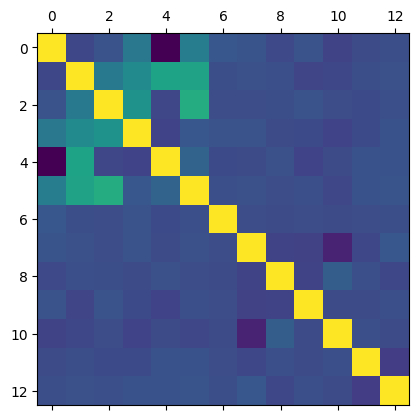

In [116]:
plt.matshow(num_df.corr())
plt.show()

In [117]:
df.to_csv("")

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,Taux de victoire 1,Taux de victoire 2,Taux de ban 1,Taux de ban 2
0,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,...,Yasuo,Senna,Nautilus,0,1,NaN,0.49328,0.49752,0.03688,0.12124
1,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,...,Jinx,Nautilus,Braum,1,0,NaN,0.50790,0.49018,0.04016,0.10424
2,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,...,Jinx,Rakan,Nautilus,1,1,NaN,0.49738,0.49134,0.08746,0.05170
3,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,Tueur de krakens,Ouragan de Runaan,...,Xayah,Rakan,Leona,0,1,NaN,0.50526,0.49450,0.07224,0.08538
4,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,Lame dinfini,Danseur fantôme,...,Zeri,Pyke,Rell,2,0,NaN,0.49952,0.49454,0.03652,0.06782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,Ekko,0.50,Master,4.50:1,Match classé Solo,NaN,Sceau noir,Dent de Nashor,...,Kai'Sa,Renata Glasc,Blitzcrank,2,2,NaN,0.49630,0.49982,0.08212,0.06038
61113,1,31.566667,Ahri,0.50,Master,4.33:1,Match classé Solo,NaN,Coiffe de Rabadon,Malfaisance,...,Aphelios,Maokai,Lulu,0,1,NaN,0.49570,0.48492,0.07860,0.02422
61114,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,Sablier de Zhonya,Fléau de liche,...,Senna,Shen,Camille,1,2,NaN,0.49570,0.49264,0.05874,0.04052
61115,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,Lame dinfini,Opportunité,...,Senna,Janna,Maokai,0,0,NaN,0.50194,0.49548,0.04410,0.05976
